tensor([[0.3374, 0.6005, 0.1735],
        [3.3359, 0.0492, 1.8374],
        [2.9704, 0.5301, 2.2620]])
tensor([[0., 0.],
        [1., 1.],
        [0., 0.]])
tensor([[0., 1.],
        [1., 1.],
        [1., 0.]])
length losses torch.Size([])


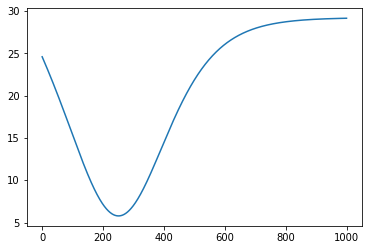

tensor([[0.1837, 0.1826],
        [1.5589, 1.5653],
        [1.5498, 1.5442]])
tensor([[2.0133, 0.2313, 1.3299],
        [2.0333, 0.2247, 1.3009]])
tensor([[0.7412, 0.0835, 0.4819],
        [6.3210, 0.7123, 4.1095],
        [6.2598, 0.7055, 4.0700]])
tensor(29.1588)


In [25]:
from typing import Tuple
import torch
import matplotlib.pyplot as plt

rank = 2
A = torch.Tensor([0.3374, 0.6005, 0.1735, 3.3359, 0.0492, 1.8374, 2.9704, 0.5301, 2.2620])
A = torch.reshape(A, (3, 3))
print(A)
losses = []
def sgd_factorise(A, rank, losses, num_epochs = 1000, lr = 0.001):
    U = torch.empty(A.size()[0], rank).random_(2)
    V = torch.empty(A.size()[1], rank).random_(2)
    print(U)
    print(V)
    for epoch in range(num_epochs):
        for i in range(A.size()[0]):
            for j in range(A.size()[1]):
                e = A[i][j] - U[i]*V[j].t()
                U[i] = U[i] + lr*e*V[j]
                V[j] = V[j] + lr*e*U[i]
        loss = torch.nn.functional.mse_loss(A, torch.matmul(U,V.t()), reduction = "sum")
        losses.append(loss)
    return U, V, losses

U, V, losses = sgd_factorise(A, rank, losses, num_epochs = 1000, lr = 0.001)
print("length losses", loss.size())
plt.plot(range(1000), losses)
plt.xlabel("iteration")
plt.ylabel("loss")
plt
plt.show()
print(U)
print(V.t())
print(torch.matmul(U,V.t()))


In [2]:
A = torch.Tensor([0.3374, 0.6005, 0.1735, 3.3359, 0.0492, 1.8374, 2.9704, 0.5301, 2.2620])
A = torch.reshape(A, (3, 3))



3
tensor([[0., 1., 1.],
        [0., 0., 1.],
        [1., 0., 1.]])
